## Handling missing values for continuous variables

In [1]:
import pandas as pd
import numpy as np

The dataset we are goging to use was prepared to predict price for used cars using the features of the car. URL of the dataset is given below.

In [2]:
filepath = "https://raw.githubusercontent.com/ujwal-sah/my_tutorials/master/Data%20Analysis%20with%20Python/auto.csv"

<p>
To better describe our data we can introduce a header, this information is available at:  <a href="https://archive.ics.uci.edu/ml/datasets/Automobile" target="_blank">https://archive.ics.uci.edu/ml/datasets/Automobile</a>
</p>
<p>
Thus, we have to add headers manually.
</p>


 Python list <b>headers</b> containing name of headers 

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter "names" equal to the Python list "headers". Set "?" as denoting missing value while reading the file using "na_values".

In [4]:
auto_price = pd.read_csv(filepath, names = headers, na_values="?")
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
auto_price.shape

(205, 26)

In [6]:
auto_price.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h4>Count missing values in each column</h4>
<p>
Using dataframe method isna() followed by sum(), we can quickly figure out the number of missing values in each column. "True" represents a missing value, "False"  means the value is present in the dataset. True is equivalent to 1 and False to 0 for sum() method. It simply returns sum for each column.
</p>

In [7]:
auto_price.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

#### 1. Row Deletion

We simply delete the rows with missing value. 

When should we apply?  
Row Deletion has the assumption that the data are missing completely at random(MCAR).

In [8]:
# simply drop whole row with NaN in "price" column
auto_price.dropna(subset=["price"], axis=0, how="any", inplace=True)

In [9]:
# reset index, because we droped two rows
auto_price.reset_index(drop=True, inplace=True)

In [10]:
auto_price.shape

(201, 26)

In [11]:
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Generally in machine learning problems, we tend not to delete rows as we will lose useful information. In the above problem, price is what we want to predict with machine learning algorithm. Any data entry without price data cannot be used for prediction training and testing therefore, any row now without price data may not be useful to us.

#### Advantages and Disadvantages of Row Deletion:

##### Advantages:
1. Easy to implement
2. Faster way to obtain the complete dataset

##### Disadvantages:
1. If data is not MCAR, it will introduce bias in the data
2. We may lose valuable information and row deletion should only be last resort

#### 2. Mean/Median Imputation

Mean/Median Imputation involves replacing the NAN with the average/median of the values.

When should we apply?  
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). 

In [12]:
#function to fill missing values with mean
def impute_nan_mean(auto_price,variable,mean):
    auto_price[variable+"_mean"]=auto_price[variable].fillna(mean)

In [13]:
#function to fill missing values with median
def impute_nan_medn(auto_price,variable,median):
    auto_price[variable+"_median"]=auto_price[variable].fillna(median)

In [14]:
avg_norm_loss = auto_price["normalized-losses"].mean()
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [15]:
impute_nan_mean(auto_price,"normalized-losses",avg_norm_loss)
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses_mean
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,122.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,122.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,122.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0


In [16]:
median_norm_loss = auto_price["normalized-losses"].median()
print("Median of normalized-losses:", median_norm_loss)

Median of normalized-losses: 115.0


In [17]:
impute_nan_medn(auto_price,"normalized-losses",median_norm_loss)
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses_mean,normalized-losses_median
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,122.0,115.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,122.0,115.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,122.0,115.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,164.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,164.0


Notice that our imputation change the variation in our dataset. Mean and median both decreased the variation, as expected.

In [18]:
print(auto_price["normalized-losses"].std())
print(auto_price["normalized-losses_mean"].std())
print(auto_price["normalized-losses_median"].std())

35.442167530553256
31.996249780247684
32.11162279312523


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

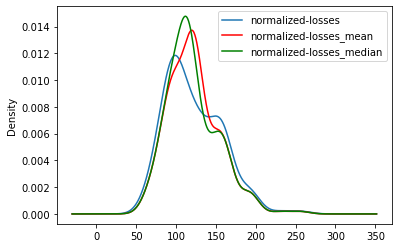

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
auto_price["normalized-losses"].plot(kind='kde', ax=ax)
auto_price["normalized-losses_mean"].plot(kind='kde', ax=ax, color='red')
auto_price["normalized-losses_median"].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Notice that both mean and median somewhat distorted the original variance of the data resulting in curves with higher peaks than original. You can try the above funtions with other columns with data MCAR. We will drop the two columns we just created before moving to other methods.

In [21]:
auto_price.drop(["normalized-losses_mean", "normalized-losses_median"], axis=1, inplace=True)
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Advantages and Disadvantages of Mean/Median Imputation

##### Advantages
1. Easy to implement
2. Median Imputation is robust to outliers
3. Faster way to obtain the complete dataset

##### Disadvantages
1. Change or Distortion in the original variance

#### 3. Random Sample Imputation

Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values.

When should it be used?   
It assumes that the data are missing completely at random(MCAR)

Let's check the number of null values in "normalized-losses" again, sice we actuall dropped rows with null values for price column.

In [22]:
auto_price["normalized-losses"].isnull().sum()

37

We need 37 random values to replace 37 missing values above. So first we will drop the rows with missing value for "normalized-losses" and then sample 37 random values from the remaining rows.

In [23]:
auto_price["normalized-losses"].dropna().sample(auto_price["normalized-losses"].isnull().sum(), random_state=0)

179    122.0
115    119.0
138    102.0
12     188.0
120     74.0
75     161.0
168    134.0
58     129.0
35      78.0
57     115.0
169     65.0
128    150.0
164    134.0
66      93.0
116    119.0
153     91.0
50     113.0
139    102.0
133    104.0
199     95.0
142     89.0
171     65.0
44     145.0
74     161.0
180     94.0
17     121.0
184     94.0
73     161.0
178    122.0
158     91.0
82     125.0
83     125.0
192    103.0
33     101.0
175    197.0
165    134.0
28     145.0
Name: normalized-losses, dtype: float64

We can find out the index for columns with missing values like shown below. We have to change the index of random values above, to the missing values below to replace the missing values with random values using assignment operation

In [24]:
auto_price.loc[auto_price["normalized-losses"].isnull(), :].index

Int64Index([  0,   1,   2,   5,   7,  13,  14,  15,  16,  42,  43,  45,  46,
             60,  63,  68,  70,  71,  72,  79,  80,  81, 106, 107, 110, 111,
            121, 123, 124, 125, 126, 127, 177, 185, 187, 188, 189],
           dtype='int64')

The function below will create two new columns. For the first column we will simply substitute the missing values with the median value like we did above. For the second column we will we will first simply copy values from original column and then replace the missing vlaues with randomly sampled values.

In [25]:
def impute_nan(auto_price,variable,median):
    
    #creating a new column by filling nan with median
    auto_price[variable+"_median"]=auto_price[variable].fillna(median)
    
    #copying ordinal data to a new column
    auto_price[variable+"_random"]=auto_price[variable]
    
    #Generating same number of random values as missing values
    random_sample = auto_price[variable].dropna().sample(auto_price[variable].isnull().sum(),random_state=0)
    
    #pandas need to have same index in order to merge the dataset
    #changing index of random_sample to index from missing values
    random_sample.index=auto_price.loc[auto_price[variable].isnull(), :].index
    
    #overwriting missing values with random values
    auto_price.loc[auto_price[variable].isnull(), variable+"_random"]=random_sample

In [26]:
median_norm_loss = auto_price["normalized-losses"].median()
print("Median of normalized-losses:", median_norm_loss)

Median of normalized-losses: 115.0


In [27]:
impute_nan(auto_price,"normalized-losses",median_norm_loss)

In [28]:
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses_median,normalized-losses_random
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,115.0,122.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,115.0,119.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,115.0,102.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,164.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,164.0


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

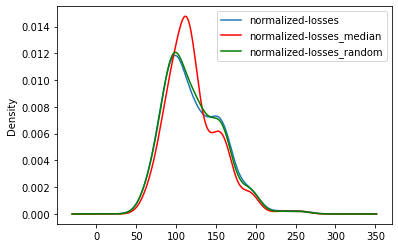

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
auto_price["normalized-losses"].plot(kind='kde', ax=ax)
auto_price["normalized-losses_median"].plot(kind='kde', ax=ax, color='red')
auto_price["normalized-losses_random"].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Notice that, as expected, substituting missing values with median somewhat distorted the original variance of the data but substituting missing values with random values overlapped the curve for original data extremely well. You can try the above funtions with other columns with data MCAR. We will drop the two columns we just created before moving to other methods.

In [31]:
auto_price.drop(["normalized-losses_median", "normalized-losses_random"], axis=1, inplace=True)
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Advantages and Disadvantages of Random Sample Imputation

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

#### 4. Capturing NAN values with a new feature

We create a new column to mark which values are missing and then we substitute the missing values with mean or median or randomly sampled values like we did above.

When should it be used?  
It works well if the data are not MCAR or MCAR 

In [32]:
#marking missing values with 1 and not missing with 0
auto_price["normalized-losses_NAN"]=np.where(auto_price["normalized-losses"].isnull(),1,0)
#or
#auto_price["normalized-losses_NAN"]=auto_price["normalized-losses_NAN"].isnull().astype(int)

In [33]:
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses_NAN
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0


We will substitute with median for now. 

In [34]:
median_norm_loss = auto_price["normalized-losses"].median()
print("Median of normalized-losses:", median_norm_loss)

Median of normalized-losses: 115.0


In [35]:
auto_price["normalized-losses"].fillna(median_norm_loss, inplace=True)

In [36]:
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses_NAN
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0


We will read the dataset again to discard all the cahnges we have made.

In [37]:
auto_price = pd.read_csv(filepath, names = headers, na_values="?")
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Advantages and Disadvantages of Capturing NaN with new feature

##### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features may hamper accuracy (Curse of Dimensionality)

#### 5. Arbitrary Value Imputation

This technique was taken from a kaggle competition. It consists of replacing NAN with an arbitrary extreme value. 

When should it be used?  
It can be used for MCAR and not MCAR

In [38]:
maximum = auto_price["normalized-losses"].max()
minimum = auto_price["normalized-losses"].min()
print("Maximum:", maximum)
print("Minimum:", minimum)

Maximum: 256.0
Minimum: 65.0


In [39]:
def impute_nan_minmax(df,variable):
    df[variable+'_max']=df[variable].fillna(maximum)
    df[variable+'_min']=df[variable].fillna(minimum)

In [40]:
impute_nan_minmax(auto_price, "normalized-losses")

In [41]:
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses_max,normalized-losses_min
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,256.0,65.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,256.0,65.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,256.0,65.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,164.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,164.0


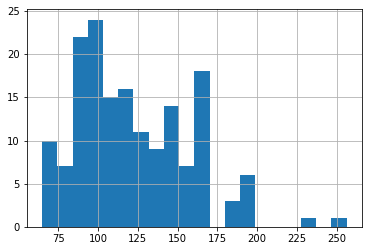

In [42]:
auto_price["normalized-losses"].hist(bins=20)

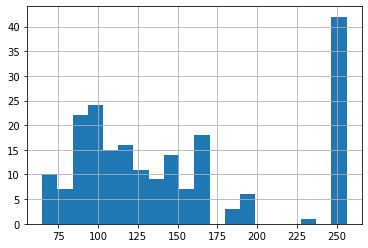

In [43]:
auto_price["normalized-losses_max"].hist(bins=20)

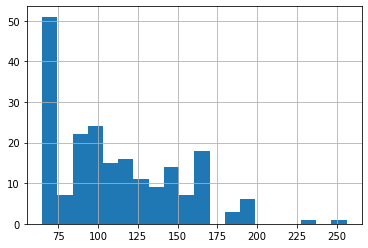

In [44]:
auto_price["normalized-losses_min"].hist(bins=20)

#### Advantages and Disadvantages of Arbitrary Value Imputation

##### Advantages

1. Easy to implement
2. Captures the importance of missingess if there is one

##### Disadvantages

1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use